In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df_categories = pd.read_csv('dataset/categories.csv')
df_customers = pd.read_csv('dataset/customers.csv')
df_employee_territory= pd.read_csv('dataset/employee_territory.csv')
df_employees = pd.read_csv('dataset/employees.csv')
df_order_details = pd.read_csv('dataset/order_details.csv')
# parse dates so OrderDate/RequiredDate/ShippedDate are datetimes
df_orders = pd.read_csv('dataset/orders.csv', parse_dates=['OrderDate', 'RequiredDate', 'ShippedDate'])
df_products = pd.read_csv('dataset/products.csv')
df_region = pd.read_csv('dataset/region.csv')
df_shippers = pd.read_csv('dataset/shippers.csv')
df_suppliers = pd.read_csv('dataset/suppliers.csv')
df_territories = pd.read_csv('dataset/territories.csv')

In [3]:
df_order_details.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0
1,10248,42,9.8,10,0
2,10248,72,34.8,5,0
3,10249,14,18.6,9,0
4,10249,51,42.4,40,0


In [4]:
df_orders.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitten,Luisenstr. 48,Mnster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprmes dlices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [8]:
orderDetails_copy = df_order_details.copy()
orderDetails_copy.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0
1,10248,42,9.8,10,0
2,10248,72,34.8,5,0
3,10249,14,18.6,9,0
4,10249,51,42.4,40,0


In [9]:
orderDetails_copy['LineSale'] = orderDetails_copy['UnitPrice'] * orderDetails_copy['Quantity']
orderDetails_copy.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,LineSale
0,10248,11,14.0,12,0,168.0
1,10248,42,9.8,10,0,98.0
2,10248,72,34.8,5,0,174.0
3,10249,14,18.6,9,0,167.4
4,10249,51,42.4,40,0,1696.0


In [10]:
agg_orderDetails_copy = orderDetails_copy.groupby('OrderID').agg(
    OrderTotal  = ('LineSale', 'sum'),
    OrderQuantity = ('Quantity', 'sum')
)

In [23]:
agg_orderDetails_copy = agg_orderDetails_copy.reset_index()

In [24]:
order_copy = df_orders.copy()

In [25]:
order_copy.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitten,Luisenstr. 48,Mnster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprmes dlices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [26]:
order_copy = pd.merge(
    order_copy,
    agg_orderDetails_copy[['OrderID', 'OrderTotal', 'OrderQuantity']],
    on='OrderID',
    how='left'
)

In [32]:
order_copy = order_copy.reset_index()
order_copy.head()

,index,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,OrderTotal,OrderQuantity
0,0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,NaN,51100,France,440.0,27
1,1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitten,Luisenstr. 48,Mnster,NaN,44087,Germany,1863.4,49
2,2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil,1813.0,60
3,3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France,670.8,41
4,4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprmes dlices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium,3730.0,105


In [33]:
orderDetails_copy.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,LineSale
0,10248,11,14.0,12,0,168.0
1,10248,42,9.8,10,0,98.0
2,10248,72,34.8,5,0,174.0
3,10249,14,18.6,9,0,167.4
4,10249,51,42.4,40,0,1696.0


recency frequency montary

In [35]:
agg_order_copy = order_copy.groupby('CustomerID').agg(
    monetary = ('OrderQuantity', 'sum'),
    frequency = ('OrderID', 'nunique'),
    last_date = ('OrderDate', 'max') 
)

In [37]:
agg_order_copy = agg_order_copy.reset_index()
agg_order_copy.head()

,CustomerID,monetary,frequency,last_date
0,ALFKI,174,6,1998-04-09
1,ANATR,63,4,1998-03-04
2,ANTON,359,7,1998-01-28
3,AROUT,650,13,1998-04-10
4,BERGS,1001,18,1998-03-04


In [39]:
specified_date = pd.to_datetime('1999-01-01')
agg_order_copy['recency'] = (specified_date - agg_order_copy['last_date']).dt.days
agg_order_copy

,CustomerID,monetary,frequency,last_date,recency
0,ALFKI,174,6,1998-04-09,267
1,ANATR,63,4,1998-03-04,303
2,ANTON,359,7,1998-01-28,338
3,AROUT,650,13,1998-04-10,266
4,BERGS,1001,18,1998-03-04,303
...,...,...,...,...,...
84,WARTH,737,15,1998-04-15,261
85,WELLI,267,9,1998-03-09,298
86,WHITC,1063,14,1998-05-01,245
87,WILMK,148,7,1998-04-07,269


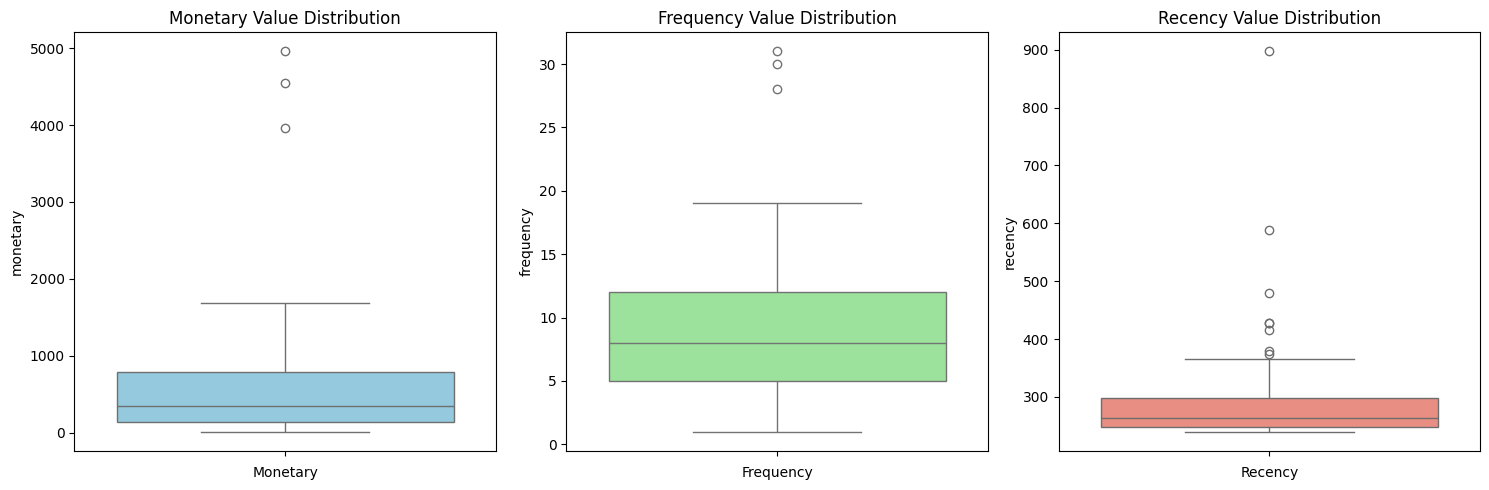

In [42]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(agg_order_copy['monetary'], color = 'skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary')

plt.subplot(1,3,2)
sns.boxplot(agg_order_copy['frequency'], color = 'lightgreen')
plt.title('Frequency Value Distribution')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(agg_order_copy['recency'], color = 'salmon')
plt.title('Recency Value Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

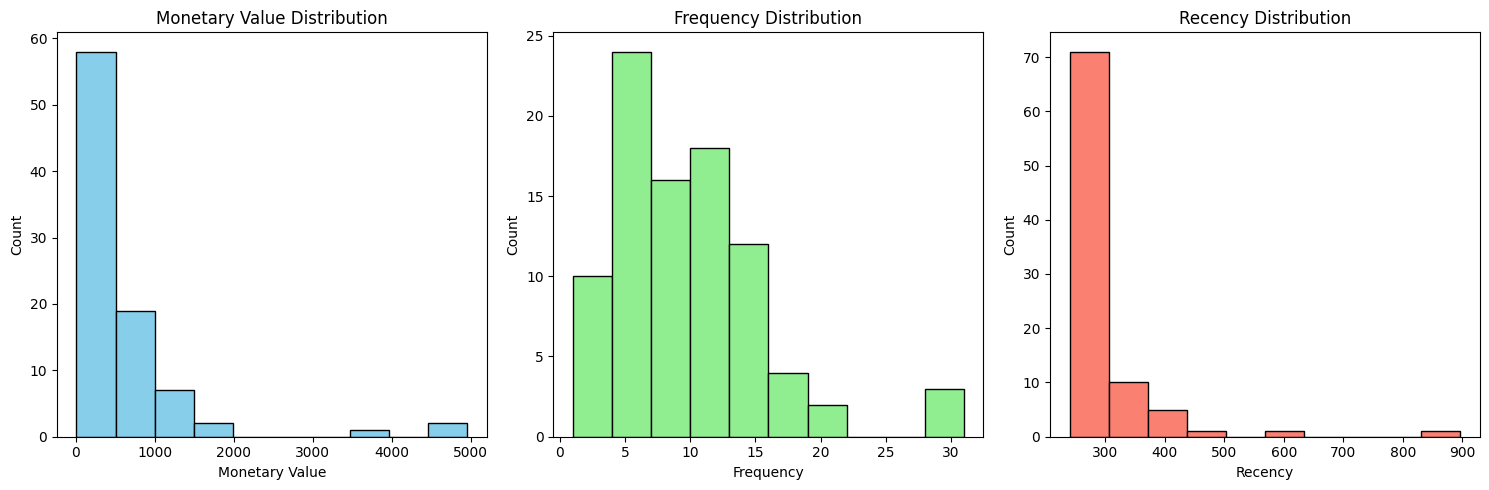

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(agg_order_copy['monetary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(agg_order_copy['frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(agg_order_copy['recency'], bins=10, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [44]:
agg_order_copy.shape

(89, 5)